Dhanraj Kadam

Roll No. 29

Div - A

<h1><center></h1>
<h1><center>Practical - 1</h1>
<h1><center>Uber Ride Price Prediction</h1>


##Imports

In [ ]:
!pip install haversine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Read the dataset

In [ ]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#Dropping useless columns

In [ ]:
df = df.drop(["Unnamed: 0", "key"], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


#Pickup Datetime Conversion

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000


#Checking if null values present and removing them

In [ ]:
df.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


#Checking if outliers Present

<Axes: >

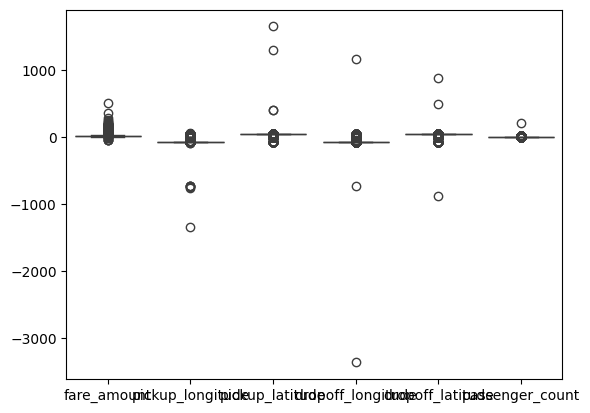

In [ ]:
sns.boxplot(df)

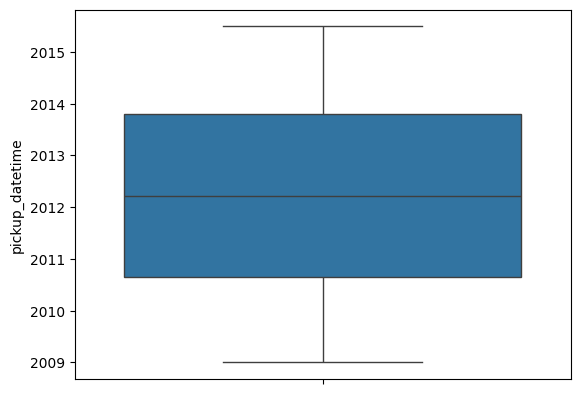

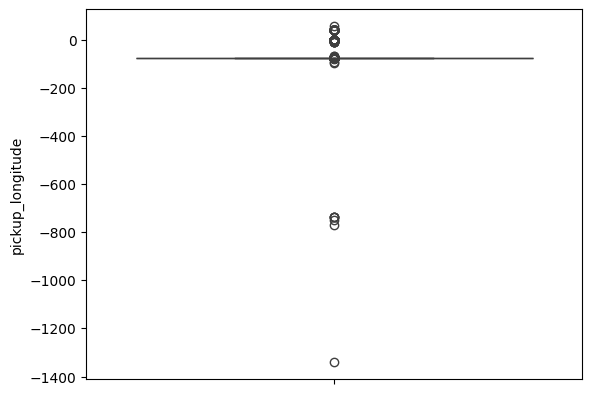

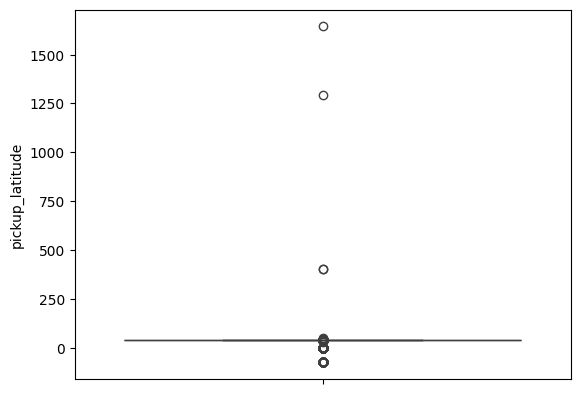

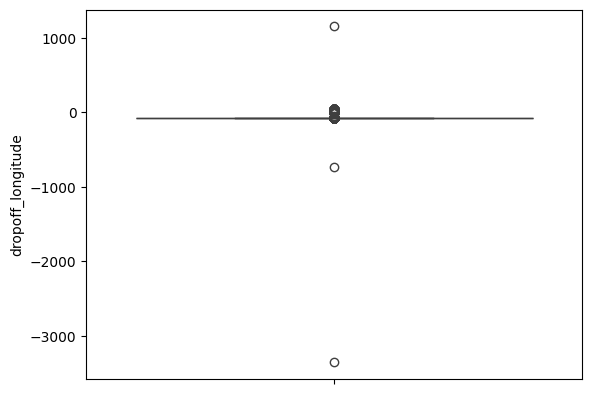

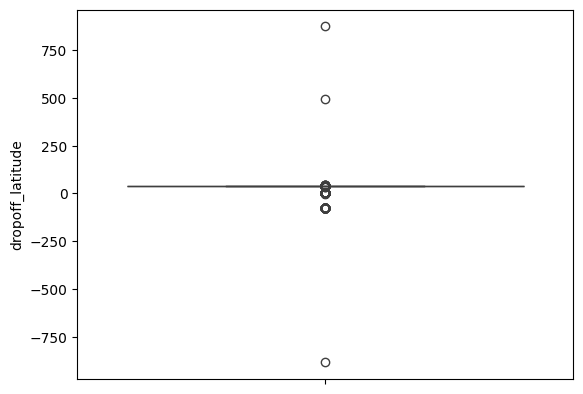

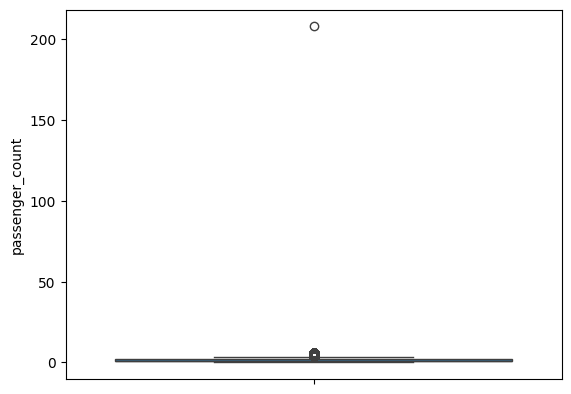

In [ ]:
for col in df.columns:
    if col != 'fare_amount':
        sns.boxplot(df[col])
        plt.show()

#Removing the outliers

In [ ]:
for col in df.columns:
    if col != 'fare_amount':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

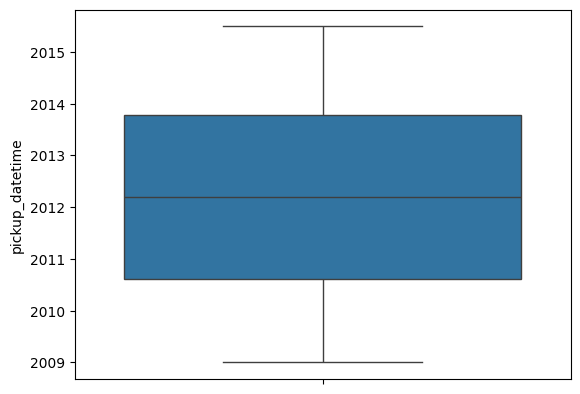

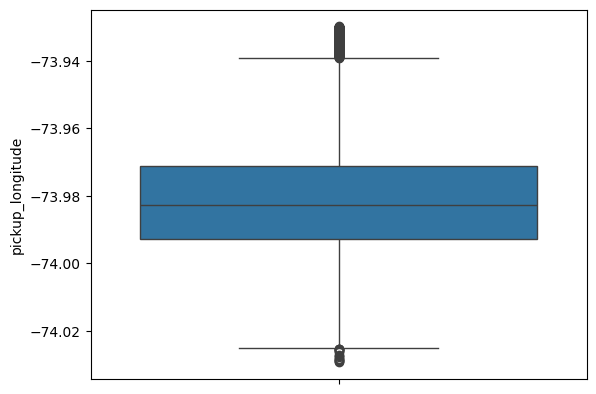

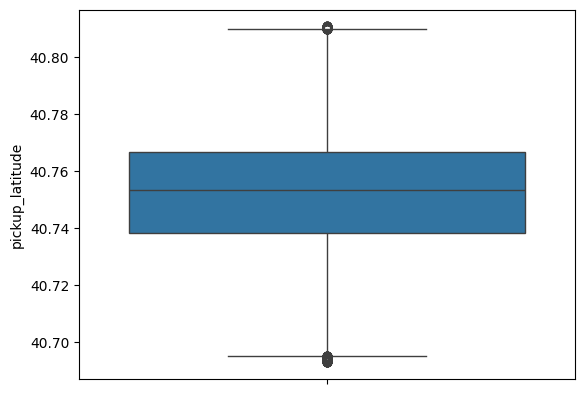

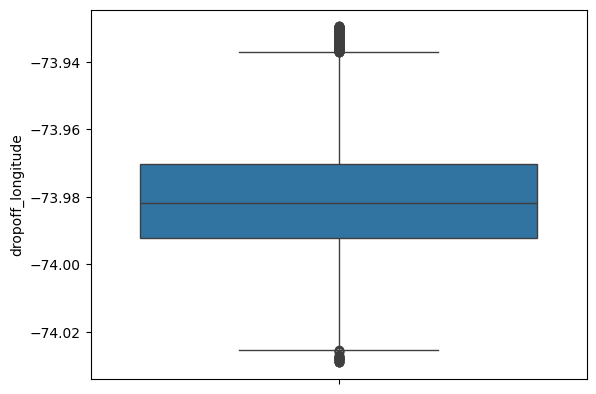

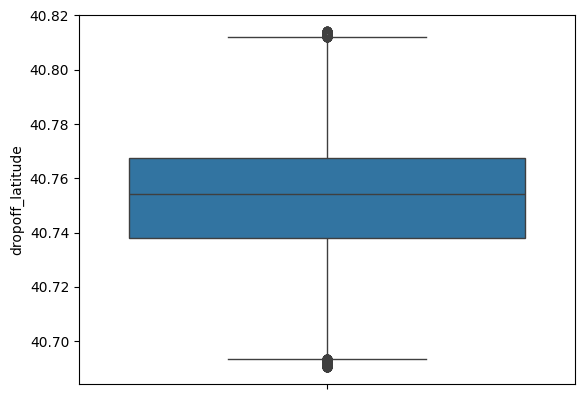

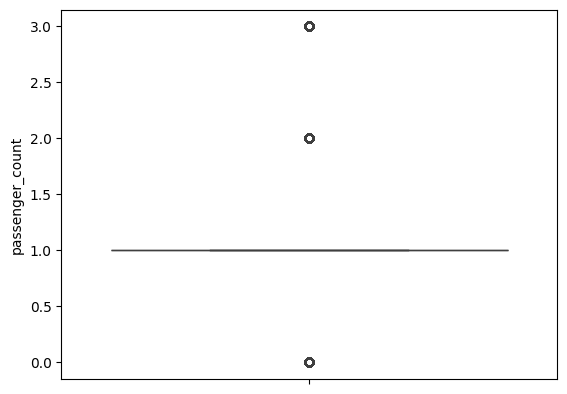

In [ ]:
for col in df.columns:
    if col != 'fare_amount':
        sns.boxplot(df[col])
        plt.show()

#Correlation

In [ ]:
corr = df.corr()
corr

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.152071,-0.039164,-0.066375,-0.011836,-0.093006,0.015894
pickup_datetime,0.152071,1.000000,-0.003831,-0.002612,0.004550,-0.002059,-0.021548
pickup_longitude,-0.039164,-0.003831,1.000000,0.688740,0.392011,0.330866,-0.022509
pickup_latitude,-0.066375,-0.002612,0.688740,1.000000,0.311382,0.472874,-0.020053
dropoff_longitude,-0.011836,0.004550,0.392011,0.311382,1.000000,0.637261,-0.014996
dropoff_latitude,-0.093006,-0.002059,0.330866,0.472874,0.637261,1.000000,-0.013156
passenger_count,0.015894,-0.021548,-0.022509,-0.020053,-0.014996,-0.013156,1.000000


#Calculating the haversine distance

In [ ]:
df['haversine_distance'] = df.apply(lambda row: hs.haversine(
    (row['pickup_latitude'], row['pickup_longitude']),
    (row['dropoff_latitude'], row['dropoff_longitude'])
), axis=1)

print(df['haversine_distance'])

0         1.683325
1         2.457593
2         5.036384
3         1.661686
5         0.000000
            ...   
199994    1.122879
199995    0.112210
199996    1.875053
199998    3.539720
199999    5.417791
Name: haversine_distance, Length: 151246, dtype: float64


In [ ]:
df = df.assign(pickup_hr = df.pickup_datetime.dt.hour,
               day= df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               day_of_week = df.pickup_datetime.dt.dayofweek)


In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,pickup_hr,day,month,year,day_of_week
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,8,26,6,2009,4
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,2,12,2,2011,5


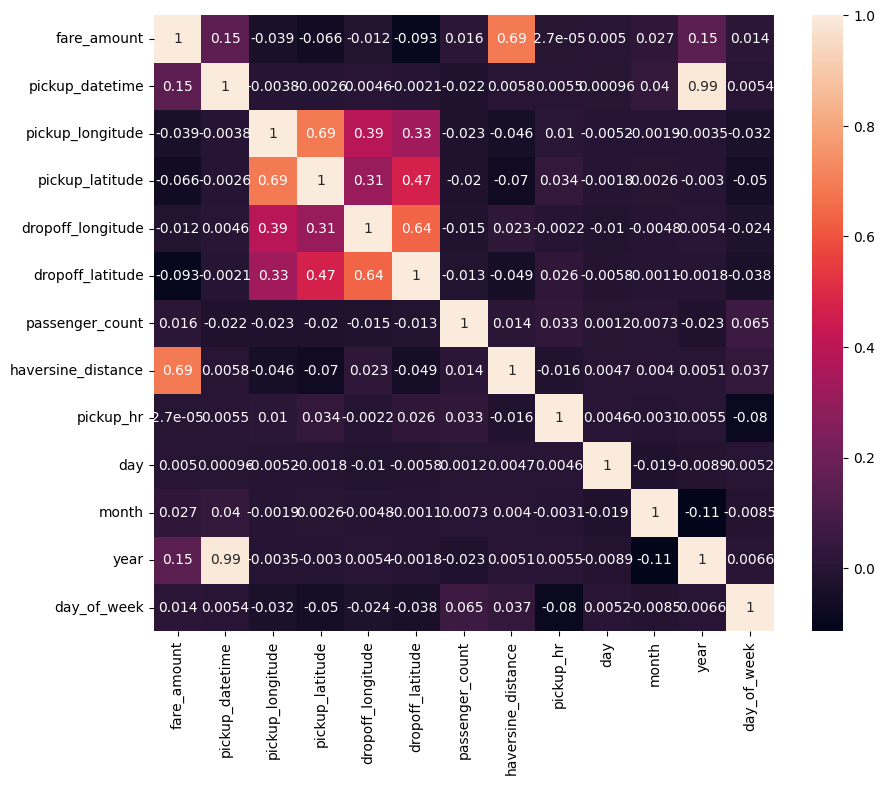

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#Feature Selection for Fare Prediction

In [ ]:
X = df[['haversine_distance', 'year', 'month', 'day', 'pickup_hr']]
y = df['fare_amount']

#Feature Scaling with StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Linear Regression Model Training and Prediction



In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Linear Regression Model Evaluation Metrics

In [ ]:
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

Linear Regression
Mean Squared Error: 16.917637276964992
R-squared: 0.4198657741058396


#Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#Model Evaluation


In [ ]:
print("Random Forest")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Random Forest
Mean Squared Error: 16.28584788246995
R-squared: 0.4415308946722071
